In [51]:
# Importation of Libraries
# Data Manipulation Libraries
import pandas as pd
import numpy as np

#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Machine Learning Libraries
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, roc_auc_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [52]:
# Loading the dataset
bank_df = pd.read_csv(r"C:\Users\Kelex\Downloads\Loan_Default.csv")
# Sample of the dataframe
bank_df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [53]:
# Shape of the dataframe
bank_df.shape

(148670, 34)

In [54]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [55]:
bank_df.isnull().any()

ID                           False
year                         False
loan_limit                    True
Gender                       False
approv_in_adv                 True
loan_type                    False
loan_purpose                  True
Credit_Worthiness            False
open_credit                  False
business_or_commercial       False
loan_amount                  False
rate_of_interest              True
Interest_rate_spread          True
Upfront_charges               True
term                          True
Neg_ammortization             True
interest_only                False
lump_sum_payment             False
property_value                True
construction_type            False
occupancy_type               False
Secured_by                   False
total_units                  False
income                        True
credit_type                  False
Credit_Score                 False
co-applicant_credit_type     False
age                           True
submission_of_applic

In [56]:
print("Missing Values: ", bank_df.isnull().sum().sum())
print("Duplicates: ", bank_df.duplicated().sum())

Missing Values:  181135
Duplicates:  0


In [57]:
def get_mssperc(bank_df):
    total = bank_df.shape[0]
    mscols = [col for col in bank_df.columns if bank_df[col].isnull().sum() > 0]
    msperc = {}
    for col in mscols:
        null_count = bank_df[col].isnull().sum()
        per = (null_count/total) * 100
        msperc[col] = per
        print("{} : {} ({}%)".format(col, null_count, round(per, 2)))

In [58]:
get_mssperc(bank_df)

loan_limit : 3344 (2.25%)
approv_in_adv : 908 (0.61%)
loan_purpose : 134 (0.09%)
rate_of_interest : 36439 (24.51%)
Interest_rate_spread : 36639 (24.64%)
Upfront_charges : 39642 (26.66%)
term : 41 (0.03%)
Neg_ammortization : 121 (0.08%)
property_value : 15098 (10.16%)
income : 9150 (6.15%)
age : 200 (0.13%)
submission_of_application : 200 (0.13%)
LTV : 15098 (10.16%)
dtir1 : 24121 (16.22%)


In [59]:
print(bank_df.nunique())

ID                           148670
year                              1
loan_limit                        2
Gender                            4
approv_in_adv                     2
loan_type                         3
loan_purpose                      4
Credit_Worthiness                 2
open_credit                       2
business_or_commercial            2
loan_amount                     211
rate_of_interest                131
Interest_rate_spread          22516
Upfront_charges               58271
term                             26
Neg_ammortization                 2
interest_only                     2
lump_sum_payment                  2
property_value                  385
construction_type                 2
occupancy_type                    3
Secured_by                        2
total_units                       4
income                         1001
credit_type                       4
Credit_Score                    401
co-applicant_credit_type          2
age                         

In [60]:
print(bank_df.apply(lambda col: col.unique()))

ID                           [24890, 24891, 24892, 24893, 24894, 24895, 248...
year                                                                    [2019]
loan_limit                                                      [cf, nan, ncf]
Gender                                [Sex Not Available, Male, Joint, Female]
approv_in_adv                                                [nopre, pre, nan]
loan_type                                                [type1, type2, type3]
loan_purpose                                             [p1, p4, p3, p2, nan]
Credit_Worthiness                                                     [l1, l2]
open_credit                                                        [nopc, opc]
business_or_commercial                                            [nob/c, b/c]
loan_amount                  [116500, 206500, 406500, 456500, 696500, 70650...
rate_of_interest             [nan, 4.56, 4.25, 4.0, 3.99, 4.5, 4.125, 4.875...
Interest_rate_spread         [nan, 0.2, 0.681, 0.304

In [61]:
bank_df['loan_limit'].value_counts()

cf     135348
ncf      9978
Name: loan_limit, dtype: int64

#### Cleaning the Dataset

In [62]:
bank_df = bank_df.drop('ID', axis = 1)
bank_df = bank_df.drop('year', axis = 1)

In [63]:
# Getting dataframes by datatype
dtypes = pd.DataFrame(bank_df.dtypes).reset_index()

cat_vars = []
num_vars = []
for i, l in zip(dtypes['index'], dtypes[0]):
    if l == 'object':
        cat_vars.append(i)
    else:
        num_vars.append(i)

In [64]:
num_vars

['loan_amount',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'property_value',
 'income',
 'Credit_Score',
 'LTV',
 'Status',
 'dtir1']

In [65]:
# Numeric Dataframe
df_num = bank_df[num_vars]

# knn
knn = KNNImputer(n_neighbors = 3)
knn.fit(df_num)
X = knn.fit_transform(df_num)

# Check for any nas
df_num = pd.DataFrame(X, columns=num_vars)
nas_num = df_num.isna().sum()
print(nas_num)

loan_amount             0
rate_of_interest        0
Interest_rate_spread    0
Upfront_charges         0
term                    0
property_value          0
income                  0
Credit_Score            0
LTV                     0
Status                  0
dtir1                   0
dtype: int64


In [66]:
# Categorical Dataframe
df_cat = bank_df[cat_vars]

for i in cat_vars:
    mode = bank_df[i].mode()
    mode = mode[0]
    df_cat[i].fillna(value=mode, inplace=True)

# Check for any nas
nas_cat = df_cat.isna().sum()
print(nas_cat)

# Combining dataframes
loan_df = pd.concat([df_num, df_cat], axis=1, join='inner')

C:\Users\Kelex\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
credit_type                  0
co-applicant_credit_type     0
age                          0
submission_of_application    0
Region                       0
Security_Type                0
dtype: int64


In [67]:
print("Missing Values: ", loan_df.isnull().sum().sum())
print("Duplicates: ", loan_df.duplicated().sum())

Missing Values:  0
Duplicates:  0


In [41]:
loan_df['term'].value_counts()

360.0    121703
180.0     12982
240.0      5863
300.0      2829
324.0      2766
120.0       510
144.0       263
348.0       260
336.0       213
96.0        194
312.0       186
156.0       174
216.0       115
276.0       100
132.0        93
288.0        90
168.0        82
228.0        75
204.0        59
264.0        43
108.0        33
192.0        17
252.0         8
320.0         2
280.0         2
340.0         2
292.0         1
260.0         1
165.0         1
268.0         1
272.0         1
322.0         1
Name: term, dtype: int64

In [68]:
#Binning term and convert into categorical.
FC=loan_df['term'].between(0,90).values
loan_df.loc[FC, 'term']=0
FC=loan_df['term'].between(91,180).values
loan_df.loc[FC, 'term']=1
FC=loan_df['term'].between(181,240).values
loan_df.loc[FC, 'term']=2
FC=loan_df['term'].between(241,360).values
loan_df.loc[FC, 'term']=3

loan_df['Status'] = loan_df['Status'].astype(str) #Convert Status as categorical

loan_df['term'].value_counts()

3.0    128209
1.0     14332
2.0      6129
Name: term, dtype: int64

In [69]:
print(loan_df.apply(lambda col: col.unique()))

loan_amount                  [116500.0, 206500.0, 406500.0, 456500.0, 69650...
rate_of_interest             [3.5833333333333335, 3.7083333333333335, 4.56,...
Interest_rate_spread         [-0.031266666666666644, 0.5229666666666667, 0....
Upfront_charges              [1386.0133333333333, 1878.3100000000002, 595.0...
term                                                           [3.0, 1.0, 2.0]
property_value               [118000.0, 251333.33333333334, 508000.0, 65800...
income                       [1740.0, 4980.0, 9480.0, 11880.0, 10440.0, 100...
Credit_Score                 [758.0, 552.0, 834.0, 587.0, 602.0, 864.0, 860...
LTV                          [98.72881356, 84.79554940000001, 80.01968504, ...
Status                                                              [1.0, 0.0]
dtir1                        [45.0, 34.666666666666664, 46.0, 42.0, 39.0, 4...
loan_limit                                                           [cf, ncf]
Gender                                [Sex Not Avail

In [70]:
# Convert object type to int
loan_df['loan_limit'].replace(['cf', 'ncf'], [0, 1], inplace=True)
loan_df['Gender'].replace(['Sex Not Available', 'Male', 'Joint', 'Female'], [0, 1, 2, 3], inplace=True)
loan_df['approv_in_adv'].replace(['nopre', 'pre'], [0, 1], inplace=True)
loan_df['loan_type'].replace(['type1', 'type2', 'type3'], [0, 1, 2], inplace=True)
loan_df['loan_purpose'].replace(['p1', 'p4', 'p3', 'p2'], [0, 1, 2, 3], inplace=True)
loan_df['Credit_Worthiness'].replace(['l1', 'l2'], [0, 1], inplace=True)
loan_df['open_credit'].replace(['nopc', 'opc'], [0, 1], inplace=True)
loan_df['business_or_commercial'].replace(['nob/c', 'b/c'], [0, 1], inplace=True)
loan_df['Neg_ammortization'].replace(['not_neg', 'neg_amm'], [0, 1], inplace=True)
loan_df['interest_only'].replace(['not_int', 'int_only'], [0, 1], inplace=True)
loan_df['lump_sum_payment'].replace(['not_lpsm', 'lpsm'], [0, 1], inplace=True)
loan_df['construction_type'].replace(['sb', 'mh'], [0, 1], inplace=True)
loan_df['occupancy_type'].replace(['pr', 'sr', 'ir'], [0, 1, 2], inplace=True)
loan_df['Secured_by'].replace(['home', 'land'], [0, 1], inplace=True)
loan_df['total_units'].replace(['1U', '2U', '3U', '4U'], [0, 1, 2, 3], inplace=True)
loan_df['credit_type'].replace(['EXP', 'EQUI', 'CRIF', 'CIB'], [0, 1, 2, 3], inplace=True)
loan_df['co-applicant_credit_type'].replace(['CIB', 'EXP'], [0, 1], inplace=True)
loan_df['age'].replace(['25-34', '55-64', '35-44', '45-54', '65-74', '>74', '<25'], [0, 1, 2, 3, 4, 5, 6], inplace=True)
loan_df['submission_of_application'].replace(['to_inst', 'not_inst'], [0, 1], inplace=True)
loan_df['Region'].replace(['south', 'North', 'central', 'North-East'], [0, 1, 2, 3], inplace=True)
loan_df['Security_Type'].replace(['direct', 'Indriect'], [0, 1], inplace=True)
loan_df['Status'].replace(['0.0', '1.0'], [0, 1], inplace=True)
print(loan_df.dtypes)

loan_amount                  float64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
property_value               float64
income                       float64
Credit_Score                 float64
LTV                          float64
Status                         int64
dtir1                        float64
loan_limit                     int64
Gender                         int64
approv_in_adv                  int64
loan_type                      int64
loan_purpose                   int64
Credit_Worthiness              int64
open_credit                    int64
business_or_commercial         int64
Neg_ammortization              int64
interest_only                  int64
lump_sum_payment               int64
construction_type              int64
occupancy_type                 int64
Secured_by                     int64
total_units                    int64
credit_type                    int64
c

Text(0.5, -0.2, 'Fig 2.0: Correlation between features and Status(y)')

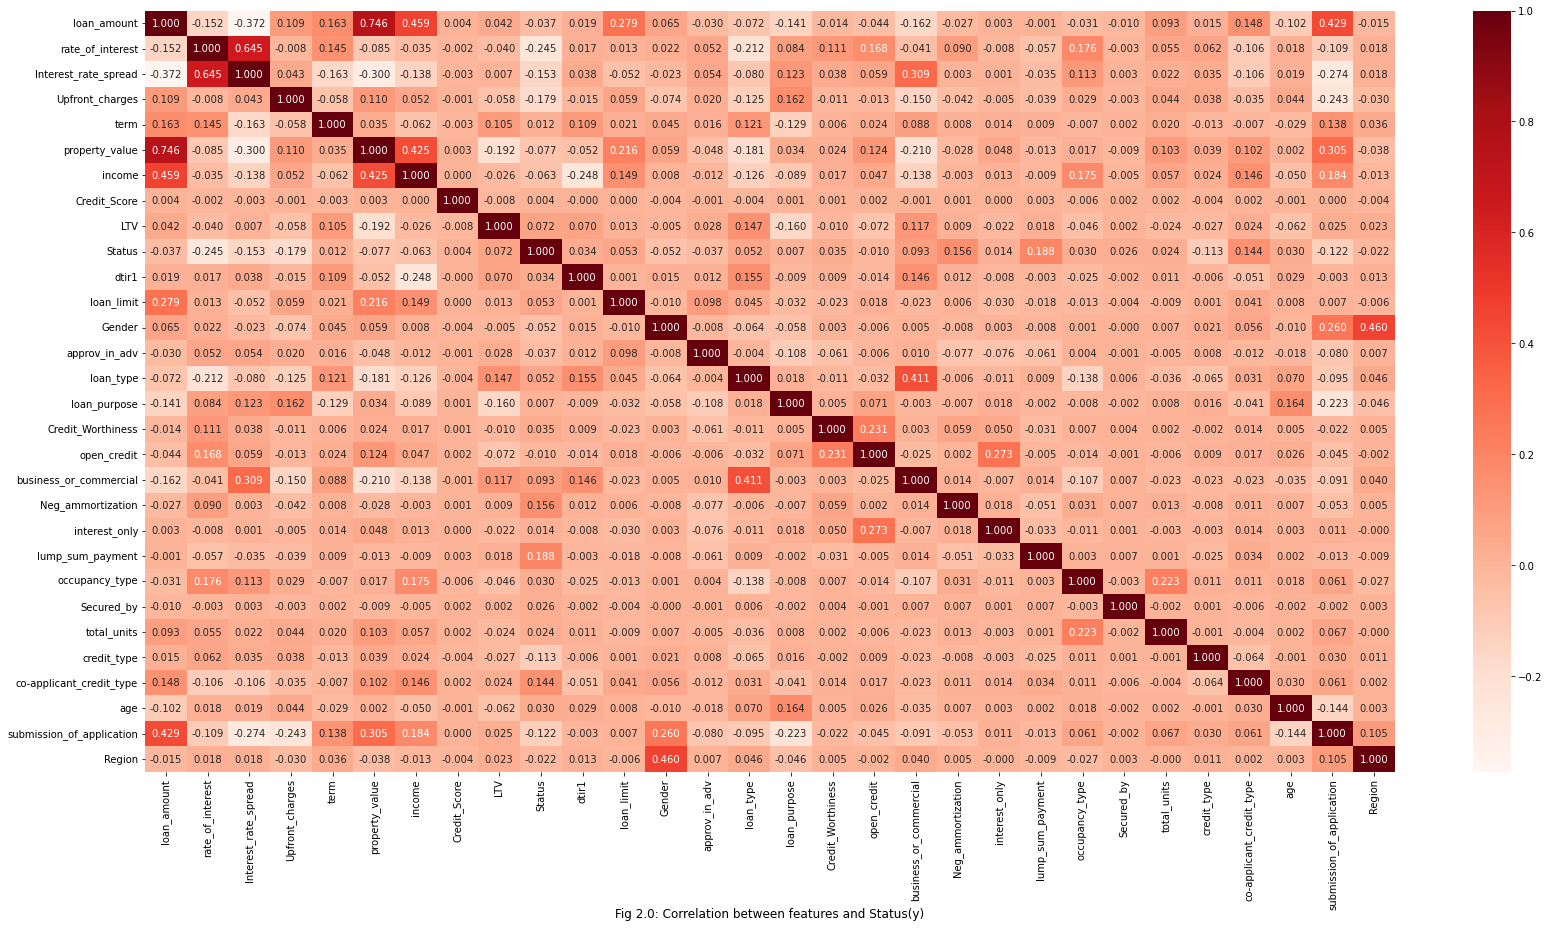

In [74]:
corr = loan_df.corr()

# plot the correlation matrix
plt.figure(figsize =(28,14))
sns.heatmap(corr, annot = True, cmap="Reds", fmt=".3f")
plt.title("Fig 2.0: Correlation between features and Status(y)", y=-0.2)

In [73]:
loan_df = loan_df.drop('construction_type', axis = 1)
loan_df = loan_df.drop('Security_Type', axis = 1)

In [81]:
loan_df['Status'].value_counts()

763.0    415
867.0    413
639.0    411
581.0    408
554.0    407
        ... 
745.0    330
573.0    330
743.0    327
748.0    324
559.0    321
Name: Credit_Score, Length: 401, dtype: int64

#### Machine Learning for Prediction

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

X = loan_df.drop(["Status"], axis = 1) # remove y from the feature variables
y = loan_df["Status"] # make y the target variable

sm = SMOTE(random_state=42)
X , y = sm.fit_resample(X,y) #remove s from X and y after using the photo below

col_names = pd.concat([X, y], axis=1).columns.tolist()
smote_array = np.concatenate([X, y.values.reshape(-1, 1)], axis=1)
df_ = pd.DataFrame(smote_array, columns=col_names)

print('Rows before SMOTE:', loan_df.shape)
print('Rows after SMOTE:', df_.shape) #remove s from X and y after using the photo below

# split the dataset into training and test chunks
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4, stratify = y) 

# scale all the features of the dataset
Ss = StandardScaler()
X_train = Ss.fit_transform(X_train)
X_test = Ss.fit_transform(X_test)

#plt.bar([0, 1], height=[sum(ys == 0), sum(ys == 1)], color=['cornflowerblue', 'lime'])
#plt.bar([0, 1], height=[sum(y == 0), sum(y == 1)], color='cornflowerblue')
#plt.xticks([0, 1])
#plt.show()

Rows before SMOTE: (148670, 30)
Rows after SMOTE: (224062, 30)


              precision    recall  f1-score   support

           0       0.94      0.86      0.90     28008
           1       0.87      0.95      0.91     28008

    accuracy                           0.90     56016
   macro avg       0.91      0.90      0.90     56016
weighted avg       0.91      0.90      0.90     56016

------------------------------------------------------
Accuracy on RF training set: 100 %
Accuracy on RF test set: 90 %
------------------------------------------------------
Features in order of importance:
rate_of_interest
credit_type
Upfront_charges
Interest_rate_spread
LTV
submission_of_application
------------------------------------------------------


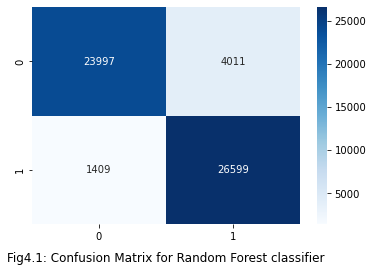

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
np.random.seed(42) # genereate same sequence.

RF = RandomForestClassifier() # load the random forest model
RF.fit(X_train, y_train) # train the model
RF_y_train_pred = RF.predict(X_train) # make predictions with the training split
RF_y_test_pred = RF.predict(X_test) # make predictions with the test split
RF_Score = round(metrics.accuracy_score(y_test, RF_y_test_pred)*100) # get the accuracy score of the predictions

# for hyper parameters
RF2 = RandomForestClassifier(n_estimators = 200, max_depth = 25, criterion = 'gini', min_samples_leaf = 1 )
RF2.fit(X_train, y_train) # train the model
RF2_y_test_pred = RF2.predict(X_test) # make predictions with the test split
RF2_Score = round(metrics.accuracy_score(y_test, RF2_y_test_pred)*100) # get the accuracy score of the predictions

# print the classification report and both the accuracy score of the train and test predictions
print(classification_report(y_test, RF_y_test_pred))
print("------------------------------------------------------")
print("Accuracy on RF training set:",round(metrics.accuracy_score(y_train, RF_y_train_pred)*100),"%")
print("Accuracy on RF test set:", RF_Score, "%")

# Print out the feature importances. Ref 7
VIft = {}
for i, name in enumerate(X): VIft.update({name : RF.feature_importances_[i]})

# Sort the top 6 features in descending order of importance
VIft_sorted = dict(sorted(VIft.items(), key=lambda x:x[1], reverse=True)[:6]) 
print("------------------------------------------------------")
# items() method returns (key,value) tuple
print('Features in order of importance:')   
for key in VIft_sorted:
    print(key)

# generate the confusion matrix
RFmat = confusion_matrix(y_test, RF_y_test_pred)
sns.heatmap(RFmat, annot = True, cmap = "Blues", fmt = "d")
plt.title(": Confusion Matrix for Random Forest classifier", y=-0.2)
print("------------------------------------------------------")

              precision    recall  f1-score   support

           0       0.77      0.79      0.78     28008
           1       0.78      0.77      0.78     28008

    accuracy                           0.78     56016
   macro avg       0.78      0.78      0.78     56016
weighted avg       0.78      0.78      0.78     56016

------------------------------------------------------
Accuracy on LR training set: 78 %
Accuracy on LR test set: 78 %
------------------------------------------------------


Text(0.5, -0.2, 'Fig6.1: Confusion matrix for Logistic Regression')

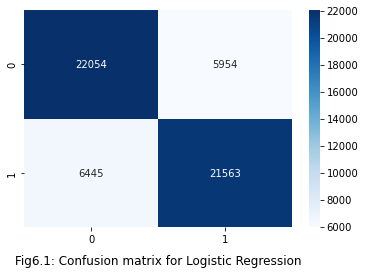

In [79]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter = 100) # load the logistic regression model
LR.fit(X_train, y_train) # train the model
LR_y_train_pred = LR.predict(X_train) # make predictions with the training split
LR_y_test_pred = LR.predict(X_test) # make predictions with the test split
LR_Score = round(metrics.accuracy_score(y_test, LR_y_test_pred)*100) # get the accuracy score of the predictions

# for hyper parameters
LR2 = LogisticRegression(C = 0.0001, max_iter = 2500, penalty = 'none', solver = 'sag')
LR2.fit(X_train, y_train) # train the model
LR2_y_test_pred = LR2.predict(X_test) # make predictions with the test split
LR2_Score = round(metrics.accuracy_score(y_test, LR2_y_test_pred)*100) # get the accuracy score of the predictions

# print the classification report and both the accuracy score of the train and test predictions
print(classification_report(y_test, LR_y_test_pred))
print("------------------------------------------------------")
print("Accuracy on LR training set:",round(metrics.accuracy_score(y_train, LR_y_train_pred)*100),"%")
print("Accuracy on LR test set:", LR_Score, "%")

# generate the confusion matrix
RFmat = confusion_matrix(y_test, LR_y_test_pred)
sns.heatmap(RFmat, annot = True, cmap = "Blues", fmt = "d")
print("------------------------------------------------------")
plt.title("Fig6.1: Confusion matrix for Logistic Regression", y=-0.2)

              precision    recall  f1-score   support

           0       0.84      0.81      0.82     28008
           1       0.81      0.84      0.83     28008

    accuracy                           0.83     56016
   macro avg       0.83      0.83      0.83     56016
weighted avg       0.83      0.83      0.83     56016

------------------------------------------------------
Accuracy on DT training set: 85 %
Accuracy on DT test set: 83 %
------------------------------------------------------
Features in order of importance:
credit_type
Upfront_charges
rate_of_interest
submission_of_application
loan_type
loan_amount
------------------------------------------------------


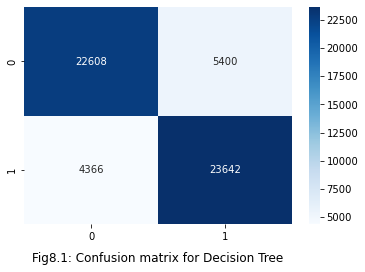

In [80]:
from sklearn import tree

DT = tree.DecisionTreeClassifier(max_depth = 6) # load the decision tree model and choose tree depth
DT.fit(X_train,y_train) # train the model
DT_y_train_pred = DT.predict(X_train) # predict with the train split
DT_y_test_pred = DT.predict(X_test) # predict with the test split
DT_Score = round(metrics.accuracy_score(y_test, DT_y_test_pred)*100) # get the model prediction accuracy

# for hyper parameters
DT2 = tree.DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 2, min_samples_split = 8) # load the decision tree model and choose tree depth
DT2.fit(X_train,y_train) # train the model
DT2_y_test_pred = DT2.predict(X_test) # predict with the test split
DT2_Score = round(metrics.accuracy_score(y_test, DT2_y_test_pred)*100) # get the model prediction accuracy

# print the classification report and both the accuracy of the train and test predictions
print(classification_report(y_test, DT_y_test_pred))
print("------------------------------------------------------")
print("Accuracy on DT training set:",round(metrics.accuracy_score(y_train, DT_y_train_pred)*100),"%")
print("Accuracy on DT test set:", DT_Score, "%")

# Print out the feature importances. Ref 7
VIft = {}
for i, name in enumerate(X): VIft.update({name : DT.feature_importances_[i]})

# Sort the top 6 features in descending order of importance
VIft_sorted = dict(sorted(VIft.items(), key=lambda x:x[1], reverse=True)[:6]) 
print("------------------------------------------------------")
# items() method returns (key,value) tuple
print('Features in order of importance:')   
for key in VIft_sorted:
    print(key)

# generate the confusion matrix
RFmat = confusion_matrix(y_test, DT_y_test_pred)
sns.heatmap(RFmat, annot = True, cmap = "Blues", fmt = "d")
plt.title("Fig8.1: Confusion matrix for Decision Tree", y=-0.2)
print("------------------------------------------------------")

In [ ]:
from sklearn.model_selection import GridSearchCV
####### defining the parameter range
RF_param_grid = {'n_estimators':[500,700,1000], 'max_depth':[10,20,40,70]}
RF_GS = GridSearchCV(estimator=RandomForestClassifier(), param_grid=RF_param_grid, cv=10,scoring='f1', n_jobs=-1)
####### fitting the model for grid search
RF_GS.fit(X_train, y_train)

####### print the best parameters
RF_GS.best_params_

In [85]:
Scores = [RF_Score, LR_Score, DT_Score, RF2_Score, LR2_Score, DT2_Score]
Models = pd.DataFrame({'Algorithm': ['Random Forest', 'Logistic Regression', 'Decision Tree',
                                     'HP Random Forest', 'HP Logistic Regression', 'HP Decision Tree'], 
                       'Accuracy (%)': Scores})
Models.sort_values(by=['Accuracy (%)'], ascending=False)

,Algorithm,Accuracy (%)
0,Random Forest,90
2,Decision Tree,83
1,Logistic Regression,78


In [83]:
print(roc_auc_score(y_test, RF_y_test_pred))
print(roc_auc_score(y_test, DT_y_test_pred))
print(roc_auc_score(y_test, LR_y_test_pred))

0.9032419308768923
0.8256569551556697
0.778652527849186


In [ ]:
from sklearn.model_selection import GridSearchCV

#### RF hyperparameters test
####### defining the parameter range
RF_param_grid = {'n_estimators':[500,700,1000], 'max_depth':[10,20,40,70]}
RF_GS = GridSearchCV(estimator=RandomForestClassifier(), param_grid=RF_param_grid, cv=10,scoring='f1', n_jobs=-1)
####### fitting the model for grid search
RF_GS.fit(X_train, y_train)

####### print the best parameters
RF_GS.best_params_

####### load the RF model using the best parameters
RF2 = RandomForestClassifier(n_estimators = 200, max_depth = 25, criterion = 'gini', min_samples_leaf = 1 )

#### DT hyperparameters test
####### defining the parameter range
DT_param_grid = {'max_depth':[50,70,20,10],'min_samples_split':[2,4,8],'min_samples_leaf':[2,4,8]}
DT_GS = GridSearchCV(estimator=tree.DecisionTreeClassifier(),cv=10,scoring='f1',n_jobs=-1,param_grid=DT_param_grid)
####### fitting the model for grid search 
DT_GS.fit(X_train, y_train)

####### print the best parameters
DT_GS.best_params_

####### load the DT model using the best parameters
DT2 = tree.DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 2, min_samples_split = 8)

#### LR hyperparameters test
from sklearn.model_selection import RepeatedStratifiedKFold

####### defining the parameter range
LR_param_grid = dict(max_iter = [100, 1000,2500, 5000], solver=['lbfgs','newton-cg','liblinear','sag','saga'], 
                     penalty=['l1', 'l2', 'elasticnet', 'none'], C = np.logspace(-4, 4, 20),)
LR_GS = GridSearchCV(estimator=LogisticRegression(), param_grid=LR_param_grid, n_jobs=-1, cv=3, scoring='accuracy', error_score=0)
####### fitting the model for grid search
LR_GS.fit(X_train, y_train)

####### print the best parameters
LR_GS.best_params_

####### load the LR model using the best parameters
LR2 = LogisticRegression(C = 0.0001, max_iter = 2500, penalty = 'none', solver = 'sag')
